# Filtro de Média Geométrica
O filtro de média geométrica é um filtro espacial não-linear de suavização de imagens e sinais. Consiste na aplicação da fórmula $$\hat{f}(x, y) = [\prod _{(s,t) \in S_{xy}} f(s,t)]^{\frac{1}{mn}} $$ na imagem, de forma que a intensidade de dado pixel seja a média geométrica dos valores dos pixels em determinada vizinhança $m \times n$.

### Implementação da Função

1. Criar na imagem original uma borda de largura $\dfrac{m}{2}$ e altura  $\dfrac{n}{2}$
2. Criar um np.ndarray (`img_filtered`) com as dimensões originais da imagem para guardar o resultado do filtro.
3. Gerar um loop varrendo todos os pixels da imagem
4. A cada pixel `img[i][j]`, fazer o produto de todos os pixels da vizinhança $m \times n$ onde ``img[i][j]`` é o pixel central e guardar em `product_region`
6. Atribuir `product_region` para `img_filtered[i][j]`
7. Retornar `img_filtered`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def geometric_mean(img, m, n):
    '''Calcula a média geométrica na imagem img com um filtro de tamanho m por n.

        Parâmetros
        ----------
        img : numpy array.
            Imagem a ser filtrada.
        m : uint
            Número de linhas para o filtro.
        n : uint
            Número de colunas para o filtro.
        Return
        -------
        img_filtered : numpy array, mesmo tamanho que img
            Imagem filtrada
    '''

    num_rows, num_cols = img.shape

    # Cria imagem com zeros ao redor da borda
    half_row_size = m//2
    half_col_size = n//2
    img_padded = np.pad(img, ((half_row_size,half_row_size),
                              (half_col_size,half_col_size)),
                        mode='constant')

    # Aplicação do filtro de média geométrica
    img_filtered = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            product_region = 1
            for s in range(m):
                for t in range(n):
                    # Pequena alteração na fórmula para impedir overflow durante
                    # a multiplicação, considera a propriedade da exponencial de 
                    # que (a * b)^n == a^n * b^n
                    product_region *= (img_padded[row+s, col+t])**(1./(m*n))
            img_filtered[row, col] = product_region

    return img_filtered

In [3]:
# Leitura da imagem
img = plt.imread('cameraman.tiff')

# Aplicação do filtro de suavização usando média geométrica
img_smooth = geometric_mean(img, m=3, n=3)

Text(0.5, 1.0, 'Imagem com Filtro de Média Geométrica')

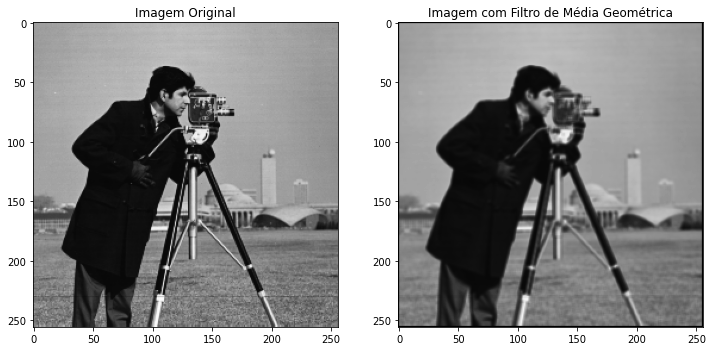

In [4]:
# Imprimindo as duas imagens
plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.subplot(1, 2, 2)
plt.imshow(img_smooth, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com Filtro de Média Geométrica")


# Filtro de Mediana

O filtro de mediana é um filtro espacial não-linear de suavização de imagens e sinais. Consiste na aplicação da fórmula $$ \hat{f}(x,y) = \underset{(s,t)\in S_{xy}}{\mathrm{mediana}} [f(s,t)] $$ na imagem, de forma que a intensidade de dado pixel seja a mediana dos valores dos pixels em determinada vizinhança $w \times w$.

### Implementação da função:

1. Criar na imagem original uma borda de largura e altura $\dfrac{w}{2}$
2. Criar um np.ndarray (`img_filtered`) com as dimensões originais da imagem para guardar o resultado do filtro.
3. Gerar um loop varrendo todos os pixels da imagem
4. A cada pixel `img[i][j]`, inserir todos os pixels da vizinhança $w \times w$ onde ``img[i][j]`` é o pixel central para dentro do vetor `med_array`
5. Ordenar `med_array` e escolher o valor central do vetor, isto é, a mediana
6. Inserir a mediana encontrada em `img_filtered[i][j]`
7. Retornar `img_filtered`

In [5]:
def median(img,w):
    '''Calcula a mediana da imagem img com um filtro de tamanho w.

    Parâmetros
    ----------
    img : numpy array.
        Imagem a ser filtrada.
    w : uint
        Número de linhas para o filtro.
    Return
    -------
    img_filtered : numpy array, mesmo tamanho que img
        Imagem filtrada
    '''
    
    num_row, num_col = img.shape
    half_filter_size = w//2
    
    #Cria uma borda tamanho w/2 ao redor da imagem
    img_padded = np.pad(img, ((half_filter_size,half_filter_size),
                              (half_filter_size,half_filter_size)),
                        mode='symmetric')
    
    
    
    #Aplicação do filtro
    img_filtered = np.zeros((num_row,num_col))
    for row in range(num_row-1):
        for col in range(num_col-1):
            
            med_array = []
            for k in range(w):
                for y in range(w):
                    med_array.append(img_padded[row+k][col+y])
            med_array = np.sort(med_array)
            median = len(med_array)//2
            
            if(len(med_array)%2 == 0):
                img_filtered[row][col] = ((med_array[median-1]*0.5)+(med_array[median]*0.5)).astype('uint8')
            else:
                img_filtered[row][col] = med_array[median]
    return img_filtered

In [9]:
#Leitura da imagem e aplicação do filtro
img = plt.imread('cameraman.tiff')
img_median = median(img,5)
type(img)

numpy.ndarray

Text(0.5, 1.0, 'Imagem com Filtro de Mediana')

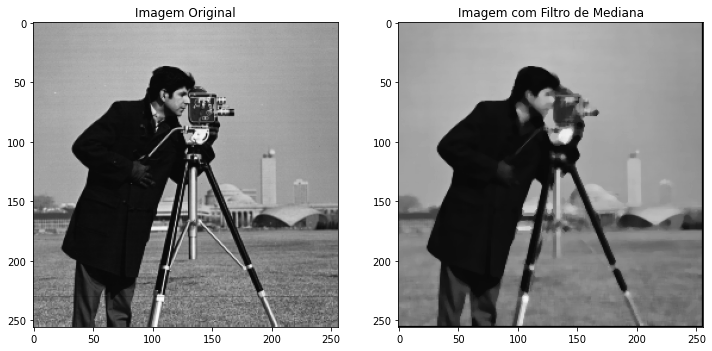

In [8]:
#Apresentação da imagem antes e depois da aplicação do filtro
plt.figure(figsize = [12,7])
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem Original")
plt.subplot(1, 2, 2)
plt.imshow(img_median, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com Filtro de Mediana")